# Word2vec Implementatiom (40 pts)

One-hot vectors have a disadvantage mentioned in class, which is that they cannot calculate meaningful similarity between word vectors. Therefore, to quantify the meaning of words and reflect meaningful similarity between word vectors, we need a method. One of the prominent methods used for this purpose is Word2Vec.

In our class, we learned about Word2Vec theoretically. In this section, we will use PyTorch to implement Word2Vec's Skip-gram model.

**Load libraries needed**


In [1]:
import torch
import numpy as np
import torch.nn.functional as F

**Corpus**  
We will use followeing nano corpus

In [2]:
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

## Problem 1. Building the word dictionary (15 pts)
The first step is to create a word dictionary using Word2Vec. Once the dictionary is created, it cannot be changed later.

A dictionary consists of a set of unique words, each associated with its corresponding index.

Although the provided dataset is simple and clear, real-world applications would involve additional preprocessing steps like text case normalization, removal of specific punctuation, and more. Nonetheless, tokenization remains an essential step even for this basic data.

### Problem 1 (a)

(3 pts) Tokenize each corpus into words.

In [3]:
def tokenize_corpus(corpus : list)-> list:
    ###############Your Code################
    tokens = []
    for doc in corpus:
        doc_tokens = doc.split(' ')
        tokens.append(doc_tokens)
    ########################################
    return tokens

tokenized_corpus = tokenize_corpus(corpus)

'''
HINT :

 Result should be like this :

 [['he', 'is', 'a', 'king'],
  ['she', 'is', 'a', 'queen'],
  ['he', 'is', 'a', 'man'],
  ['she', 'is', 'a', 'woman'],
  ['warsaw', 'is', 'poland', 'capital'],
  ['berlin', 'is', 'germany', 'capital'],
  ['paris', 'is', 'france', 'capital']]

'''

"\nHINT :\n\n Result should be like this :\n\n [['he', 'is', 'a', 'king'],\n  ['she', 'is', 'a', 'queen'],\n  ['he', 'is', 'a', 'man'],\n  ['she', 'is', 'a', 'woman'],\n  ['warsaw', 'is', 'poland', 'capital'],\n  ['berlin', 'is', 'germany', 'capital'],\n  ['paris', 'is', 'france', 'capital']]\n\n"

In [4]:
print(tokenized_corpus)

[['he', 'is', 'a', 'king'], ['she', 'is', 'a', 'queen'], ['he', 'is', 'a', 'man'], ['she', 'is', 'a', 'woman'], ['warsaw', 'is', 'poland', 'capital'], ['berlin', 'is', 'germany', 'capital'], ['paris', 'is', 'france', 'capital']]


In [5]:
for i in tokenized_corpus :
    print(i)

['he', 'is', 'a', 'king']
['she', 'is', 'a', 'queen']
['he', 'is', 'a', 'man']
['she', 'is', 'a', 'woman']
['warsaw', 'is', 'poland', 'capital']
['berlin', 'is', 'germany', 'capital']
['paris', 'is', 'france', 'capital']


### Problem 1 (b)
(4pts) We iterate over tokens in corpus, and generate list of unique words(tokens). Next we create two dictionaries for mapping between word and index.

You should return 3 objectives, vocabulary (list), word2idx (dict), idx2word (dict)

In [6]:
def build_vocab(tokenized_corpus : list):
    vocabulary = []
    #####################YOUR CODE#########################
    for tokens in tokenized_corpus:
        for token in tokens:
            if token not in vocabulary:
                vocabulary.append(token)
    word2idx = {item: i for i, item in enumerate(vocabulary)}
    idx2word = {i: item for i, item in enumerate(vocabulary)}
    #######################################################

    return vocabulary, word2idx, idx2word


'''
HINT :
 You should return the following result for vocabulary. :
 ['he', 'is', 'a', 'king', ... ]

 You should return the following result for word2idx. :
 {'he': 0, 'is': 1, 'a': 2, 'king': 3, 'she': 4, ... , 'france': 14}

 You should return the following result for idx2word. :
 {0: 'he', 1: 'is', 2: 'a', 3: 'king', 4: 'she', ... , 14: 'france'}

'''

vocabulary, word2idx, idx2word = build_vocab(tokenized_corpus)
vocabulary_size = len(vocabulary)

In [7]:
print(vocabulary)
print(word2idx)
print(idx2word)

['he', 'is', 'a', 'king', 'she', 'queen', 'man', 'woman', 'warsaw', 'poland', 'capital', 'berlin', 'germany', 'paris', 'france']
{'he': 0, 'is': 1, 'a': 2, 'king': 3, 'she': 4, 'queen': 5, 'man': 6, 'woman': 7, 'warsaw': 8, 'poland': 9, 'capital': 10, 'berlin': 11, 'germany': 12, 'paris': 13, 'france': 14}
{0: 'he', 1: 'is', 2: 'a', 3: 'king', 4: 'she', 5: 'queen', 6: 'man', 7: 'woman', 8: 'warsaw', 9: 'poland', 10: 'capital', 11: 'berlin', 12: 'germany', 13: 'paris', 14: 'france'}


### Problem 1 (c)
(8 pts) We can now generate pairs center word, context word. Let’s assume context window to be symmetric and equal to 2.

This gives you the example :

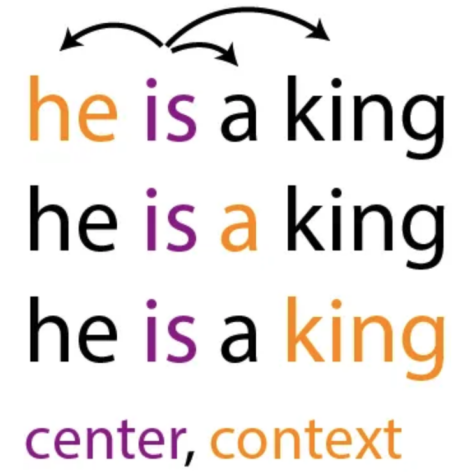

It provides us with a list of pairs consisting of center and context indices.

In [8]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        ###################Your Code#########################
        # HINT 1 : You should run a loop for each window position.
        # HINT 2 : Be mindful of cases where the window extends beyond the sentence.
        
        # Calculate the window's start and end positions, and ensure they are within the sentence's boundaries
        window_start = max(0, center_word_pos - window_size)
        window_end = min(len(indices), center_word_pos + window_size + 1)

        # Extract indices of words around the center word within the window
        context_indices = indices[window_start:center_word_pos] + indices[center_word_pos+1:window_end]

        # Create pairs: (center word, context word)
        for context_idx in context_indices:
            idx_pairs.append([indices[center_word_pos], context_idx])
        
        #####################################################
'''
HINT 3 :

 You should return the following result. :
 idx_pairs = array([[ 0,  1],  [ 0,  2], [ 1,  0], [ 1,  2], [ 1,  3], ..., [10, 14]])

 Which can be easily translated to words:

 he is

 he a

 is he

 is a

 is king
'''

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array

In [9]:
idx_pairs

array([[ 0,  1],
       [ 0,  2],
       [ 1,  0],
       [ 1,  2],
       [ 1,  3],
       [ 2,  0],
       [ 2,  1],
       [ 2,  3],
       [ 3,  1],
       [ 3,  2],
       [ 4,  1],
       [ 4,  2],
       [ 1,  4],
       [ 1,  2],
       [ 1,  5],
       [ 2,  4],
       [ 2,  1],
       [ 2,  5],
       [ 5,  1],
       [ 5,  2],
       [ 0,  1],
       [ 0,  2],
       [ 1,  0],
       [ 1,  2],
       [ 1,  6],
       [ 2,  0],
       [ 2,  1],
       [ 2,  6],
       [ 6,  1],
       [ 6,  2],
       [ 4,  1],
       [ 4,  2],
       [ 1,  4],
       [ 1,  2],
       [ 1,  7],
       [ 2,  4],
       [ 2,  1],
       [ 2,  7],
       [ 7,  1],
       [ 7,  2],
       [ 8,  1],
       [ 8,  9],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 9,  8],
       [ 9,  1],
       [ 9, 10],
       [10,  1],
       [10,  9],
       [11,  1],
       [11, 12],
       [ 1, 11],
       [ 1, 12],
       [ 1, 10],
       [12, 11],
       [12,  1],
       [12, 10],
       [10,  1

## Problem 2. Implement Skip-gram (25pts)
### Define goal
Now, we are going through details from very first equation to working implementation.

For skip-gram we are interested in predicting context, given center word and some parametrization. This is our probability distribution for single pair: P(context|center;Θ)

Now we want to maximize it trough all word/context pairs: 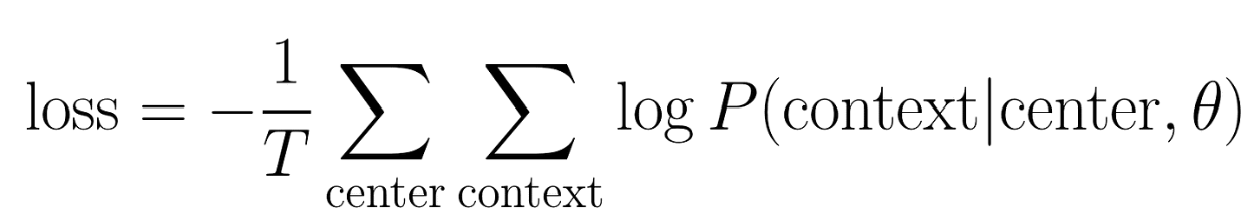

### Define Conditional Probability
Let's define P(context|center). For now, let’s assume that reach word has actually two vectors. One if is present as center word (v), and second one if context(u). Given that definition for P looks following
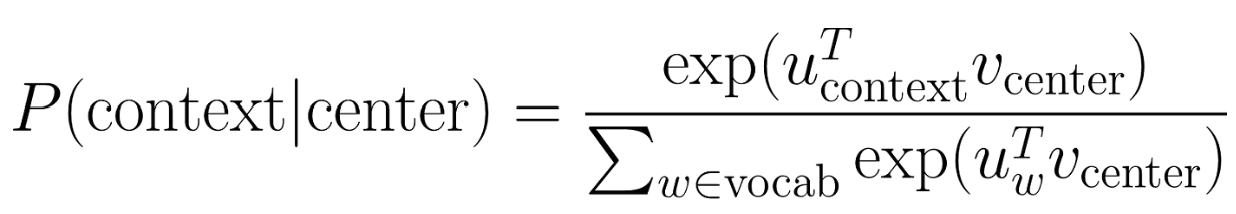

### Coding
Neural net implementing this concept consists of three layers: input, hidden and output.


### Problem 2 (a) Input layer
(5 pts) Input layer is just the center word encoded in one-hot manner. It dimensions are [1, vocabulary_size]

In [10]:
vocabulary_size = len(word2idx)
def get_input_layer(word_idx):
    ##################YOUR CODE######################
    x = torch.zeros(size=(1, vocabulary_size))
    x[0, word_idx] = 1
    #################################################
    return x

### Problem 2 (b) Hidden layer
(5 pts) The hidden layer generates our "v" vectors, so it must consist of "embedding_dims" neurons. To calculate its value, we need to define the weight matrix "W1." Specifically, it should have dimensions of [embedding_dims, vocabulary_size]. There is no activation function involved; it's a straightforward matrix multiplication.

In [11]:
embedding_dims = 5
########################YOUR CODE (1 line)#####################
W1 = torch.randn(embedding_dims, vocabulary_size, requires_grad=True)
###############################################################

### Problem 2 (c) Output layer
(5 pts) The final layer should consist of "vocabulary_size" neurons because it calculates probabilities for each word. Consequently, the shape of W2 is [vocabulary_size, embedding_dims].

In [12]:
########################YOUR CODE (1 line)#####################
W2 = torch.randn(vocabulary_size, embedding_dims, requires_grad=True)
##################################################################

### Problem 2 (d) Training

(10 pts)
Utilizing the previously created get_input_layer fucntion, W1 and W2, let's construct the model.

In [13]:
from tqdm.auto import tqdm

In [14]:
num_epochs = 100
learning_rate = 0.001

for epo in tqdm(range(num_epochs)):
    loss_val = 0
    for data, target in idx_pairs:
        y_true = torch.from_numpy(np.array([target])).long()

        ###################YOUR CODE ( ~ 3 lines)####################
        x = get_input_layer(data)
        z1 = torch.matmul(W1, x.t())  # transpose x to match the dimension of W1
        z2 = torch.matmul(W2, z1)
        ##############################################################

        log_softmax = F.log_softmax(z2, dim=0)
        # Define Loss function as log softmax
        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.item()
        # Backprop
        loss.backward()
        # update parameter
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 10 == 0:
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

  0%|          | 0/100 [00:00<?, ?it/s]

Loss at epo 0: 4.6552425682544705
Loss at epo 10: 4.164691690461976
Loss at epo 20: 3.8287463554314205
Loss at epo 30: 3.5732467591762545
Loss at epo 40: 3.3698795144047056
Loss at epo 50: 3.2034239798784254
Loss at epo 60: 3.064470341375896
Loss at epo 70: 2.9467723054545267
Loss at epo 80: 2.8459503318582264
Loss at epo 90: 2.758783862420491


## Visualization

Well Done! Let's examine the relationships between words using the word vectors you've generated.

It is possible in three ways:

- Use vector v from W1
- Use vector u from W2
- Use average v and u

In [15]:
word_embeddings = W1.detach().numpy()

word_to_embedding = {}
j = 0
for el in vocabulary :
    word_to_embedding[el] = []
    for i in range(len(word_embeddings)) :
        word_to_embedding[el].append(word_embeddings[i][j])
    j += 1

In [16]:
word_to_embedding

{'he': [-0.45682314, -0.32796183, 0.29026446, -0.61010814, -0.88139915],
 'is': [-0.6640274, 0.53530496, -0.15828767, -1.403085, -1.1903816],
 'a': [0.0011722955, -0.039827764, -1.299658, -0.9475705, 0.38338065],
 'king': [0.57420355, -0.09305937, -0.062908076, 0.146114, 0.8481949],
 'she': [-0.07463637, -1.946621, -0.27692652, -0.094517425, 0.8024752],
 'queen': [2.1825569, 0.31756634, -0.8804143, -0.61460966, 0.53380084],
 'man': [-0.57643026, -0.5946625, -1.4990455, 1.4862442, 0.24503553],
 'woman': [0.5258167, -0.78422797, 0.053884763, 0.5563141, -0.65493625],
 'warsaw': [0.033589534, -0.64469576, -0.5023873, 0.33340394, -0.9471567],
 'poland': [-0.47613898, -0.8499714, -0.57297164, 2.0241492, 0.66739047],
 'capital': [0.009654072, -0.12164987, 0.21241485, -1.2310336, -0.66296184],
 'berlin': [0.3159962, -1.6135691, -1.2147369, -0.21156669, -0.04120373],
 'germany': [-2.0047119, 0.6408773, -1.3271419, -1.1477573, 0.7546307],
 'paris': [1.3763562, -0.09367253, -0.5543291, 0.38663256

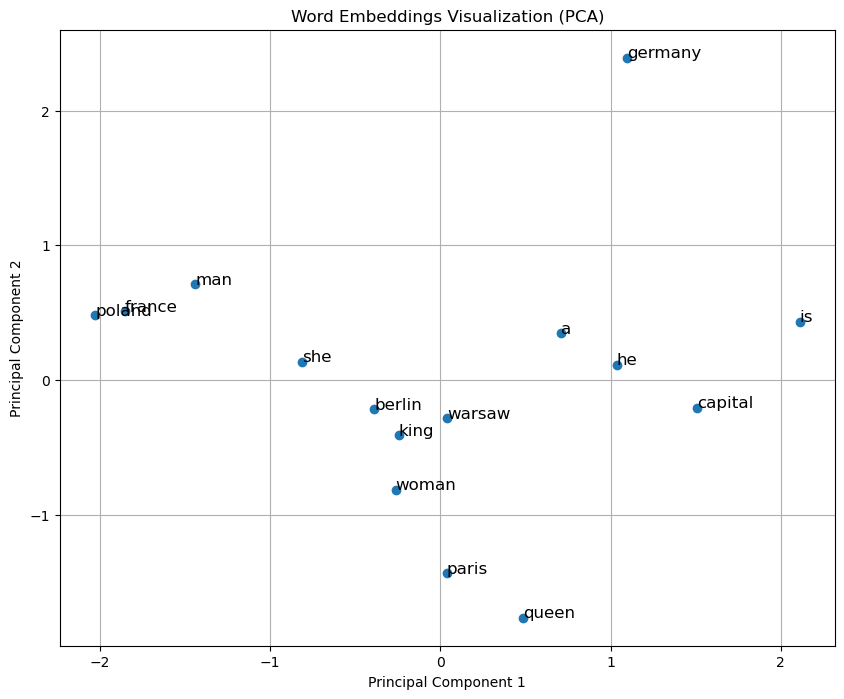

In [17]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


embeddings = word_to_embedding
embedding_matrix = np.array(list(embeddings.values()))

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_matrix)

# Create a scatter plot for visualization
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate the points with the corresponding words
for i, word in enumerate(embeddings.keys()):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=12)

plt.title('Word Embeddings Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()